# ***Visão geral:***

In [1]:
# Função para extrair a diferença entre o valor real e o valor aproximado da integração númerica
def DIF(Valor):
    DIF = 0
    ResReal = 0.5
    DIF = ResReal - Valor
    return DIF

In [2]:
# Introduzindo ao código as bibliotecas de interesse
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### ***Problema)***  
Ao ser difratada por um semiplano a intensidade luminosa varia com a distância
$x$ da borda de acordo com
$$I(w) = \frac{1}{2} I_{0} {\left\{\left[C(w) + \frac{1}{2} \right] ^ 2 +  \left[S(w) + \frac{1}{2} \right] ^ 2\right\}},$$
onde
$$C(w) = \int_{0}^{x} cos(\frac{\pi w ^ 2}{2}) dw$$
e
$$S(w) = \int_{0}^{x} sen(\frac{\pi w ^ 2}{2}) dw$$
são as $\textbf{integrais de Fresnel}$.

Estude a $\textbf{teoria da difração}$ e verifique as expressões acima. Escreva seus
próprios programas para calcular $I(x)$ utilizando o $\textbf{método de Romberg}$.

## Visualização da área a ser integrada:

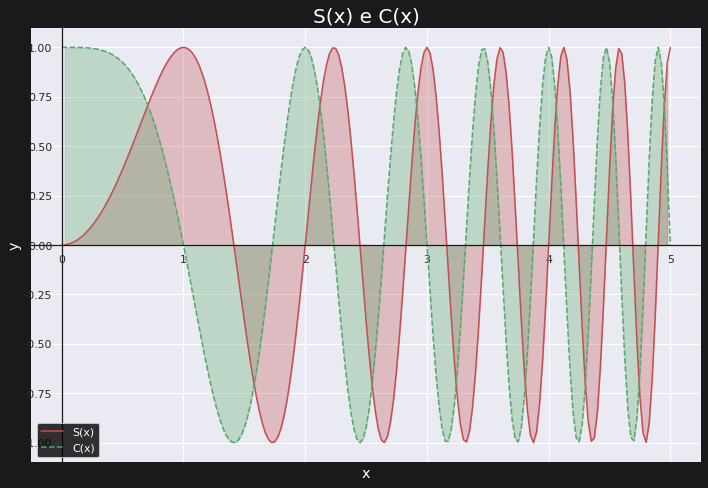

In [3]:
# Criacao de dados
t = np.linspace(0, 5, 201)

# Criacao de funcoes anonimas para representar S(x) e C(x)
c = lambda x: np.cos((np.pi * np.power(x, 2)) / 2)
s = lambda x: np.sin((np.pi * np.power(x, 2)) / 2)

# Estilizando a plotagem
sns.set_theme()
plt.rcParams.update({'text.color': "white"})
plt.rcParams.update({'legend.facecolor': "black"})
plt.rcParams.update({'axes.labelcolor': "white"})
plt.rc('axes', edgecolor = 'k')

# Plot
fig, ax = plt.subplots(figsize = (12, 8), facecolor = 'k')
plt.plot(t, s(t), 'r-', label = 'S(x)')
plt.plot(t, c(t), 'g--', label = 'C(x)')
plt.fill_between(t, s(t), where = \
                [(t > 0) and (t < 5) for t in t], \
                color = 'r', alpha = 0.3)
plt.fill_between(t, c(t), where = \
                [(t > 0) and (t < 5) for t in t], \
                color = 'g', alpha = 0.3)
plt.title('S(x) e C(x)', size = 20)
ax.grid(True, which = 'both')
plt.ylabel(r'y', fontsize = 'large')
plt.xlabel(r'x', fontsize = 'large')
ax.yaxis.set_label_coords(-0.015, 0.5)
ax.xaxis.set_label_coords(0.5, -0.01)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.legend()
plt.show()


### ***Contexto)***
#### **Difração de Fresnel**
É o tipo de difração cujo tratamento matemático é mais complexo. Nesse caso, a onda que se desloca não é plana. Para se calcular a distribuição da intensidade da luz difratada em função do ângulo de espalhamento é comum se usar da $\textit{espiral de Cornu}$.

<center> <img src = 'https://pbs.twimg.com/media/EGSGuDDWwAAuFUi.jpg' width="700"> </center>

A equação da difração de Fresnel é usada para calcular o padrão de difração criado por ondas passando por uma fenda ou em volta de um objeto, quando visto relativamente próximo do objeto (diz-se que a onda se propaga em um "campo próximo"). Esse campo pode ser calculado pelo número de Fresnel). Múltiplas difrações de $\textit{Fresnel}$ podem causar a reflexão especular, sendo este o reflexo espelhado da luz (ou de outros tipos de onda) em uma superfície, no qual a luz de uma única direção de entrada (um raio) é refletida em uma única direção de saída.

<center> 

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Tso_Kiagar_Lake_Ladakh.jpg/800px-Tso_Kiagar_Lake_Ladakh.jpg'> </center>

Para uma onda eletromagnética que atravessa uma abertura e impacta sobre um ecrã, o número de Fresnel $F$ define-se como:

$$F = \frac{a^{2}}{L \lambda}$$

Onde $\lambda$ é o comprimento de onda, $a$ é o tamanho (por exemplo o raio) da abertura e $L$ é a distância a partir da abertura até ao ecrã. Múltiplas difrações de Fresnel podem causar a **reflexão especular**, 

#### **Integrais de Fresnel:**



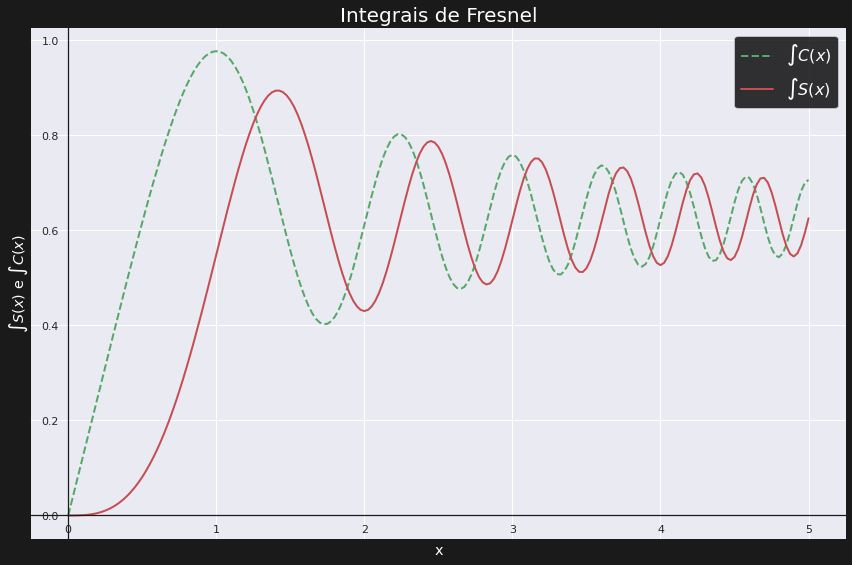

In [4]:
ss, cc = sc.special.fresnel(t)

scaled_ss = np.sqrt(np.pi / 2) * ss
scaled_cc = np.sqrt(np.pi / 2) * cc

sns.set_theme()
plt.rcParams.update({'text.color': "white"})
plt.rcParams.update({'legend.facecolor': "black"})
plt.rcParams.update({'axes.labelcolor': "white"})
plt.rc('axes', edgecolor = 'k')

fig, ax = plt.subplots(figsize = (12, 8), facecolor = 'k')
plt.plot(t, scaled_cc, 'g--', linewidth = 2, label = '$\int{C(x)}$')
plt.plot(t, scaled_ss, 'r-', linewidth = 2, label = r"$\int{S(x)}$")
plt.grid(True, which = 'both')
plt.title("Integrais de Fresnel", size = 20)
plt.ylabel(r'$\int{S(x)}$ e $\int{C(x)}$', fontsize = 'large')
plt.xlabel(r'x', fontsize = 'large')
ax.yaxis.set_label_coords(-0.002, 0.5)
ax.xaxis.set_label_coords(0.5, -0.01)
plt.legend(fontsize = 16)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.tight_layout()
plt.show()

## Espiral de Cornu:

A simultânea equação paramétrica de $S(x)$ e $C(x)$ é a <b> espiral de Cornu </b> (também conhecida como clotóide e como espiral de Euler). Conseguimos facilmente o plot da espiral utilizando o seguinte trecho de código:

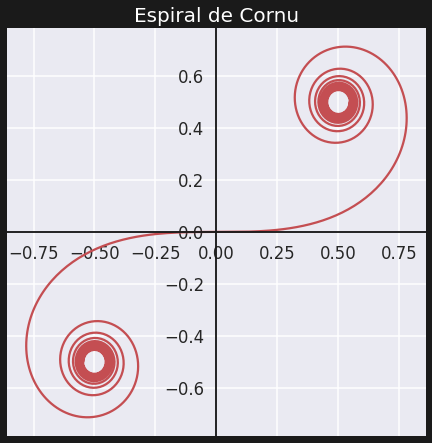

In [5]:
sns.set_theme()
t = np.linspace(-7, 7, 1000)
y, x = sc.special.fresnel(t)

# Estilizando a plotagem
sns.set_context("talk")
plt.rc('axes', edgecolor = 'k')
plt.rcParams.update({'text.color': "white"})

# Plot
fig, ax = plt.subplots(figsize = (7.5, 7.5), facecolor = 'k')
plt.plot(x, y, 'r')
plt.title('Espiral de Cornu', size = 20)
ax.grid(True, which = 'both')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.show()

A espiral de Cornu ((x, y) = (C(x), S(x))) converge do centro dos buracos na imagem à medida que x tende para o infinito, positivo ou negativo.

**Propriedades**:
* $C(x)$ e $S(x)$ são funções ímpares de $x$;
* Usando as séries de potências $$\normalsize{S(x) = \sum_{n = 0}^{\infty} (-1) ^ n \frac{x ^ {4n + 3}}{(2n + 1)!(4n + 3)}; C(x) = \sum_{n = 0}^{\infty} (-1) ^ n \frac{x ^ {4n + 1}}{(2n)!(4n + 1)}},$$ as integrais de Fresnel podem ser estendidas ao domínios dos números complexos e tornam-se funções analíticas de uma variável complexa;
* $C$ e $S$ são funções inteiras;
* As integrais definidas $C(x)$ e $S(x)$ não podem ser avaliadas em uma expressão fechada em termo de funções elementares, exceto em casos especiais. Os limites desta funções à medida que $x$ se aproxima do infinito são conhecidos: $$\normalsize{\int_{0}^{\infty} cos(w ^ 2) dt = \int_{0}^{\infty} sen(w ^ 2) dt = \frac{\sqrt{2\pi}}{4} = \sqrt{\frac{\pi}{8}}}$$ Para conseguir as funções com argumento $\frac{\pi w ^ 2}{2}$, multiplicamos as integrais acima por $\sqrt{\frac{2}{\pi}}$ e multiplicamos o argumento $x$ por $(\frac{\pi}{2}) ^ {\frac{1}{2}}$.

# **Métodos:**

In [6]:
'''
module trapezoid
Inew = trapezoid(f,a,b,Iold,k).
Recursive trapezoidal rule:
Iold = Integral of f(x) from x = a to b computed by
trapezoidal rule with 2**(k-1) panels.
Inew = Same integral computed with 2**k panels.
'''

def Trapezio(f, a, b, Iold, k):
    if k == 1 : Inew = (f(a) + f(b)) * (b - a) / 2.0
    else:
        n = 2 ** (k - 2) 
        h = (b - a) / n
        x = a + h / 2.0 
        sum = 0.0
        for i in range(n):  
            sum = sum + f(x)
            x = x + h
        Inew = (Iold + h * sum) / 2.0
    return Inew

def Romberg(f, a, b, tol = 1.0e-6):
    def Richardson(r, k):
        for j in range(k - 1, 0, -1):
            const = 4.0 ** (k - j)
            r[j] = (const * r[j + 1] - r[j]) / (const - 1.0)
        return r
    r = np.zeros(21)
    r[1] = Trapezio(f, a, b, 0.0, 1)
    r_old = r[1]
    for k in range(2, 21):
        r[k] = Trapezio(f, a, b, r[k - 1], k)
        r = Richardson(r, k)
        if abs(r[1] - r_old) < tol * max(abs(r[1]), 1.0):
            return r[1], 2**(k-1)
        r_old = r[1]
    return None, print('Quadratura de Romberg nao converge!')

# Main apenas criacao e declaração de variáveis
ResReal = 0.50000000
Slista = np.zeros(1)
nS = np.zeros(1)
DIFSlista = np.zeros(1)
DIFClista = np.zeros(1)
Clista = np.zeros(1)
nC = np.zeros(1)
S, n = Romberg(s, 0, 10)
Slista[0] = S
DIFSlista[0] = DIF(S)
nS[0] = n
C, n = Romberg(c, 0, 10)
Clista[0] = C
DIFClista[0] = DIF(C)
nC[0] = n
I = (1 / 2) * ((C + (1 / 2)) ** 2 + (S + (1 / 2)) ** 2)
print(S, C, I)


# Usando um dicionário para cada lista de valores
dictR = {'nS' : nS,
        'S(x)' : Slista,
        'DIF(S)' : DIFSlista,
        'nC' : nC,
        'C(x)' : Clista,
        'DIF(C)' : DIFClista}

# Criacao do dataframe 
dfR = pd.DataFrame(dictR)
dfR.index = dfR.index + 1
dfR.head(4)

0.4681699785663224 0.4998986985628082 0.9685752573923554


,nS,S(x),DIF(S),nC,C(x),DIF(C)
1,2048.0,0.46817,0.03183,1024.0,0.499899,0.000101


In [7]:
def Simpson13(f, a, b, n):
    """
    Calcula a integral de uma funcao f num dado intervalo [a,b]
    usando o metodo de Simpson 1/3
    Variáveis de entrada 
      f :: Funcao - f(x)
      a e b :: Intervalo de integracao
      n :: Numero de subintervalos (tem que ser par)
    Variáveis de saída:
      I :: Resultado da integral calculada por Simpson 1/3
      h :: Largura dos subintervalos
    """
    
    
    if ((n % 2)!=0): # verificando se n é par
        print("Erro! n precisa ser par.")
        I = False
        return I
    h = (b - a) / float(n)
    x = np.linspace(a, b, n + 1)
    F = f(x)
    I = (F[0] + 4 * sum(F[1 : n : 2]) + 2 * sum(F[2 : n - 1 : 2]) + F[n]) * h / 3
    return I, h

nInter = np.arange(2, 42, 2)
Slist = np.zeros(len(nInter))
DIFSlist = np.zeros(len(nInter))
Clist = np.zeros(len(nInter))
DIFClist = np.zeros(len(nInter))
for i in range(len(nInter)):
  print('Subintervalos =', nInter[i])
  S, n1 = Simpson13(s, 0, 10, nInter[i])
  Slist[i], DIFSlist[i] = S, DIF(S)
  print(r'S(x) =', S, '/ Largura dos intervalos =', n1, '/ DIF = ', f'{DIF(S):0.6f}')
  C, n2 = Simpson13(c, 0, 10, nInter[i])
  Clist[i], DIFClist[i] = C, DIF(C)
  print(r'C(x) =', C, '/ Largura dos intervalos =', n2, '/ DIF = ', f'{DIF(C):0.6f}')
  print('\n')

dict = {'n' : nInter,
        'S(x)' : Slist,
        'DIF(S)' : DIFSlist,
        'C(x)' : Clist,
        'DIF(C)' : DIFClist}

Subintervalos = 2
S(x) = 6.666666666666668 / Largura dos intervalos = 5.0 / DIF =  -6.166667
C(x) = 3.333333333333332 / Largura dos intervalos = 5.0 / DIF =  -2.833333


Subintervalos = 4
S(x) = 1.6666666666666525 / Largura dos intervalos = 2.5 / DIF =  -1.166667
C(x) = 1.6666666666666725 / Largura dos intervalos = 2.5 / DIF =  -1.166667


Subintervalos = 6
S(x) = 1.4563150014894 / Largura dos intervalos = 1.6666666666666667 / DIF =  -0.956315
C(x) = -0.03324765026502894 / Largura dos intervalos = 1.6666666666666667 / DIF =  0.533248


Subintervalos = 8
S(x) = 1.357003117541036 / Largura dos intervalos = 1.25 / DIF =  -0.857003
C(x) = -0.8929745925695413 / Largura dos intervalos = 1.25 / DIF =  1.392975


Subintervalos = 10
S(x) = 6.666666666666662 / Largura dos intervalos = 1.0 / DIF =  -6.166667
C(x) = 3.333333333333359 / Largura dos intervalos = 1.0 / DIF =  -2.833333


Subintervalos = 12
S(x) = 2.1917423538831273 / Largura dos intervalos = 0.8333333333333334 / DIF =  -1.691742
C(x)

In [8]:
df = pd.DataFrame(dict)
df.index = df.index + 1
df.head(100)

,n,S(x),DIF(S),C(x),DIF(C)
1,2,6.666667,-6.166667,3.333333,-2.833333
2,4,1.666667,-1.166667,1.666667,-1.166667
3,6,1.456315,-0.956315,-0.033248,0.533248
4,8,1.357003,-0.857003,-0.892975,1.392975
5,10,6.666667,-6.166667,3.333333,-2.833333
6,12,2.191742,-1.691742,0.446546,0.053454
7,14,4.283246,-3.783246,-0.637939,1.137939
8,16,-1.430958,1.930958,1.704768,-1.204768
9,18,1.409725,-0.909725,2.002246,-1.502246
10,20,1.666667,-1.166667,1.666667,-1.166667
